<a href="https://colab.research.google.com/github/manjunath-hanmantgad/python-development/blob/master/Variable_discretization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using equal-width, equal-frequency, arbitrary, k-means, and decision tree-based discretization.

Many machine learning algorithms prefer or perform better when numerical input variables have a standard probability distribution.Discretization transforms are a technique for transforming numerical input or output variables to have discrete ordinal labels.

** transform of the numerical variable to have a discrete probability distribution where each numerical value is assigned a label and the labels have an ordered (ordinal) relationship.

This is called a binning or a discretization transform and can improve the performance of some machine learning models for datasets by making the probability distribution of numerical input variables discrete **

### K-means

Uniform: Each bin has the same width in the span of possible values for the variable.

Quantile: Each bin has the same number of values, split based on percentiles.

Clustered: Clusters are identified and examples are assigned to each group.

shape of data:(208, 61)
describe the variables: <bound method NDFrame.describe of          0       1       2       3       4       5       6       7       8   \
0    0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
203  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
204  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
205  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
206  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
207  0.0260  0.0363  0.0136  0.0272  0.0214  0.03

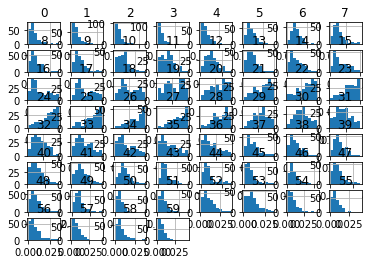

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# laod dataset
url =  "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
data = pd.read_csv(url, header=None)
print(f"shape of data:{data.shape}")
print(f"describe the variables: {data.describe}")
#histograms of data
data.hist()
plt.show()



Data is skewed as we can see from the distribution.

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [3]:
# separate teh dataset
data = data.values # if values is not added then error will come
X,y = data[:, :-1], data[:, -1]
# X = float and y = int label 
X = X.astype("float")
y = LabelEncoder().fit_transform(y.astype("str"))


In [4]:
from numpy import mean
from numpy import std
# build model 
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


### Performing uniform discretization

In [5]:
# define the pipeline 
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
t_transformer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t',t_transformer),('m',model)])
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_1 = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
n_scores = cross_val_score(pipeline,X,y, scoring='accuracy',cv=cv, n_jobs=-1,error_score='raise')
n_scores_1 = cross_val_score(pipeline,X,y, scoring='accuracy',cv=cv_1, n_jobs=-1,error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
print('Accuracy: %.3f (%.3f)' % (mean(n_scores_1), std(n_scores_1)))


Accuracy: 0.829 (0.079)
Accuracy: 0.837 (0.104)


### K-means discretization

fit k clusters for each input variable and then assign each observation to a cluster.


In [8]:
t_transformer_1 =  KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#data = data.values
data = t_transformer_1.fit_transform(data)

ValueError: ignored

### Quantile Discretization Transform

In [9]:
from numpy import mean,std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
dataset = read_csv(url, header=None)
data = dataset.values

# separate into train and test

X,y = data[:, :-1], data[:, -1]
print(X)
print(y)

[[0.02 0.0371 0.0428 ... 0.0084 0.009 0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018 ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049 ... 0.0079 0.0036 0.0048]
 [0.026 0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 

In [10]:
# X is float and y is int label 
X = X.astype('float')
y = LabelEncoder().fit_transform(y.astype('str'))

# pipeline
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.072)


In [13]:
# suppose we want to test with multiple n_bins 

# define the dataset func 
def get_dataset():
  url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
  dataset = read_csv(url, header=None)
  data = dataset.values
 # separate into input and output columns
  X, y = data[:, :-1], data[:, -1]
 # ensure inputs are floats and output is an integer label
  X = X.astype('float32')
  y = LabelEncoder().fit_transform(y.astype('str'))
  return X, y

# get list of models to evaluate 
def get_models():
  models = dict()
  for i in range(2,11):
    # build pipeline
    trans = KBinsDiscretizer(n_bins=i, encode='ordinal', strategy='quantile')
    model = KNeighborsClassifier()
    models[str(i)] = Pipeline(steps=[('t', trans), ('m', model)])
    return models 

# evaluate the models using cross validation 

def evaluate_model(model,X,y):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  return scores

# get the data
X, y = get_dataset()

# get models to evaulate 
models = get_models()

# evaluate models and store result 
results, names = list(), list()
for name , model in models.items():
  scores = evaluate_model(model, X , y)
  results.append(scores)
  names.append(name)
print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))


>2 0.822 (0.066)
